In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\athar\AppData\Local\Temp\ipykernel_21560\3610919214.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Dataset
[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [2]:
plasma = pd.read_csv('plasma\metabolic tests\plasma(Specific Metabolics).csv')
serum = pd.read_csv('serum\metabolic tests\serum(Specific Metabolics).csv')
plasma.head()
plasma = plasma.drop('Unnamed: 0', axis=1)
serum = serum.drop('Unnamed: 0', axis=1)

Keep labels as an numpy array.

In [3]:
labels = np.reshape(plasma.Class.to_numpy(), (82,1))
targets = plasma.iloc[:, -1].unique()

# PCA, tSNE & Other Functions
## PCA

In [4]:
from sklearn.decomposition import PCA
def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)

    return pca_concatenate

In [5]:
def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [6]:
def plotting(pca_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))
    fig.suptitle("Principal Component Analysis",fontsize=20)

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'PC{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'PC{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = pca_df.Class == target
                axes[i, j-1].scatter(pca_df.loc[indicesToKeep, f'pc{i+1}']
                                , pca_df.loc[indicesToKeep, f'pc{j+1}'], c = color, s = 50)
    fig.legend(targets,prop={'size': 15}, loc='upper right')

## t-SNE

In [7]:
from sklearn.manifold import TSNE
def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)

    return tsne_concatenate

In [8]:
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [9]:
def tsne_plotting(tsne_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))
    fig.suptitle("t-SNE",fontsize=20)

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'TSNE{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'TSNE{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = tsne_df.Class == target
                axes[i, j-1].scatter(tsne_df.loc[indicesToKeep, f'tsne{i+1}']
                                , tsne_df.loc[indicesToKeep, f'tsne{j+1}'], c = color, s = 50)
    fig.legend(targets,prop={'size': 15}, loc='upper right')

# EDA
## Plasma

In [10]:
pca2_plasma = pca_analysis(plasma, 2)

pca2_plasma_df = make_dataframe(pca2_plasma, 2)
# print(pca2_plasma_df.head)

<Figure size 640x480 with 0 Axes>

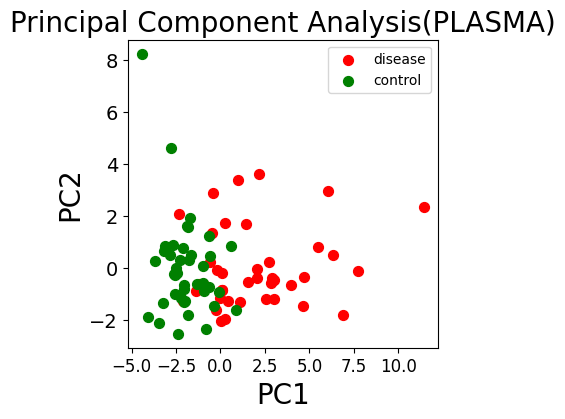

In [11]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis(PLASMA)",fontsize=20)
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_plasma_df.Class == target
    plt.scatter(pca2_plasma_df.loc[indicesToKeep, 'pc1']
               , pca2_plasma_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [12]:
pca3_plasma = pca_analysis(plasma, 3)

pca3_plasma_df = make_dataframe(pca3_plasma, 3)
# print(pca3_df.head)

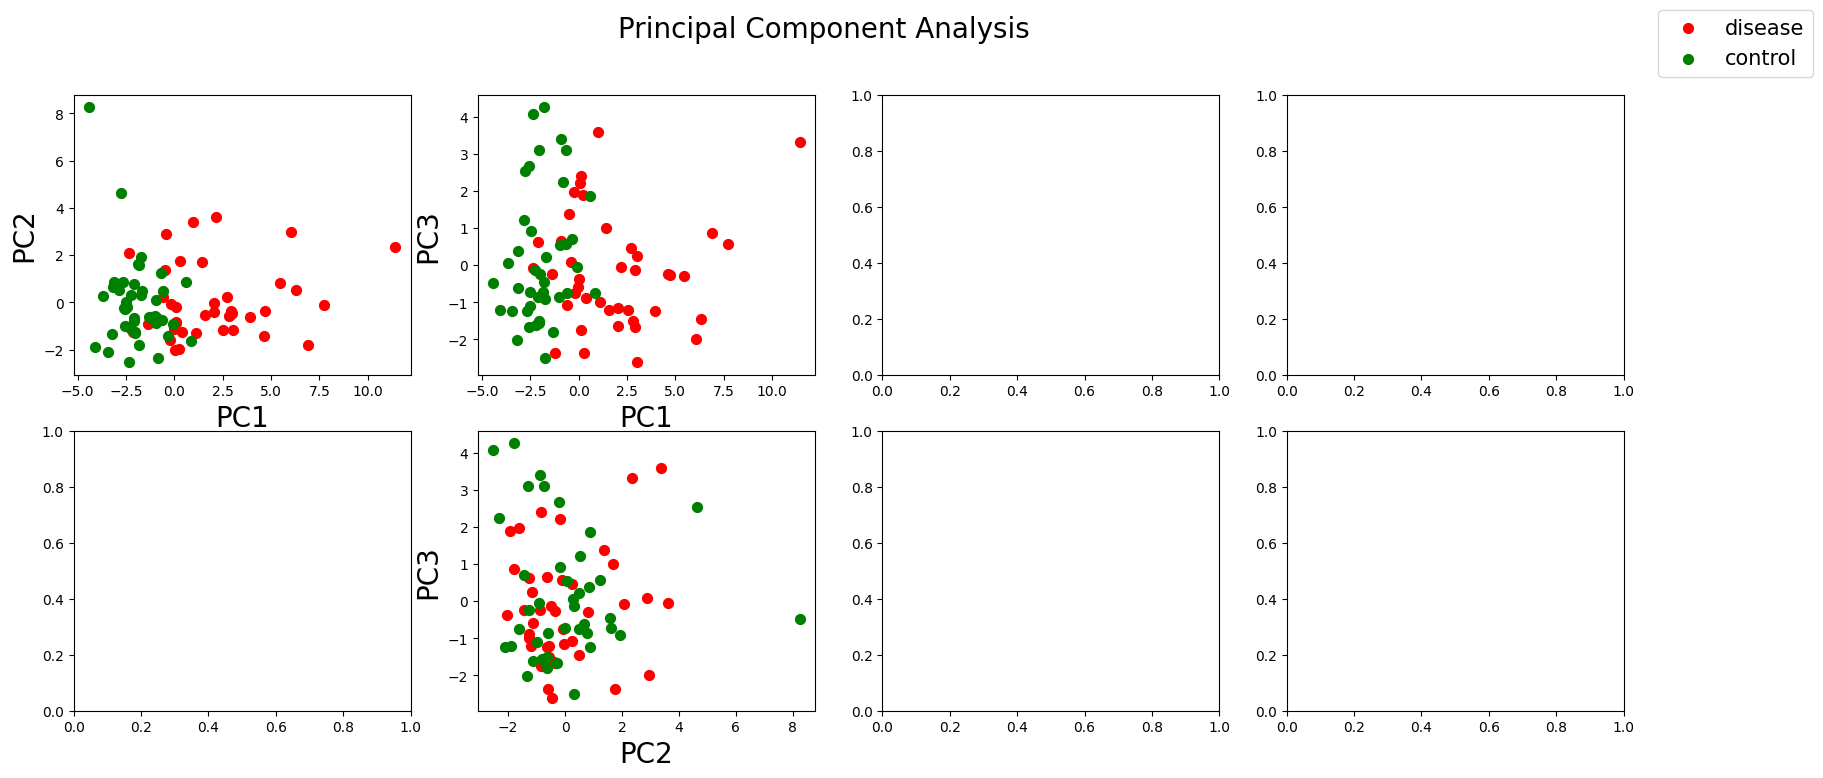

In [13]:
plotting(pca3_plasma_df, 3)

In [14]:
pca4_plasma = pca_analysis(plasma, 4)

pca4_plasma_df = make_dataframe(pca4_plasma, 4)
# print(pca4_plasma_df.head)

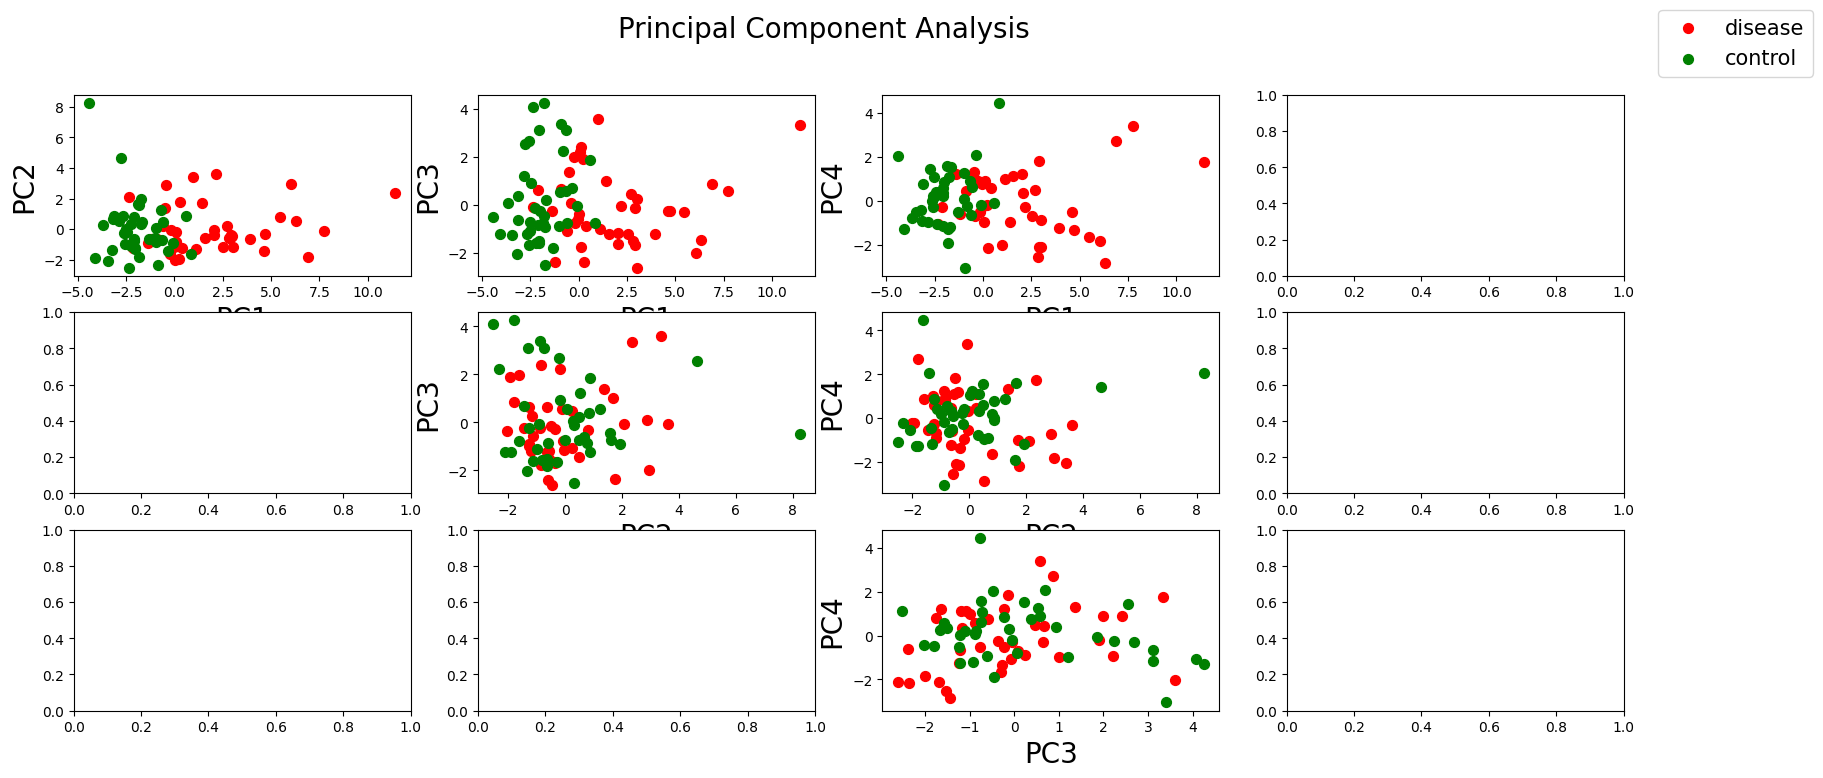

In [15]:
plotting(pca4_plasma_df, 4)

In [16]:
pca5_plasma = pca_analysis(plasma, 5)

pca5_plasma_df = make_dataframe(pca5_plasma, 5)
# print(pca5_df.head)

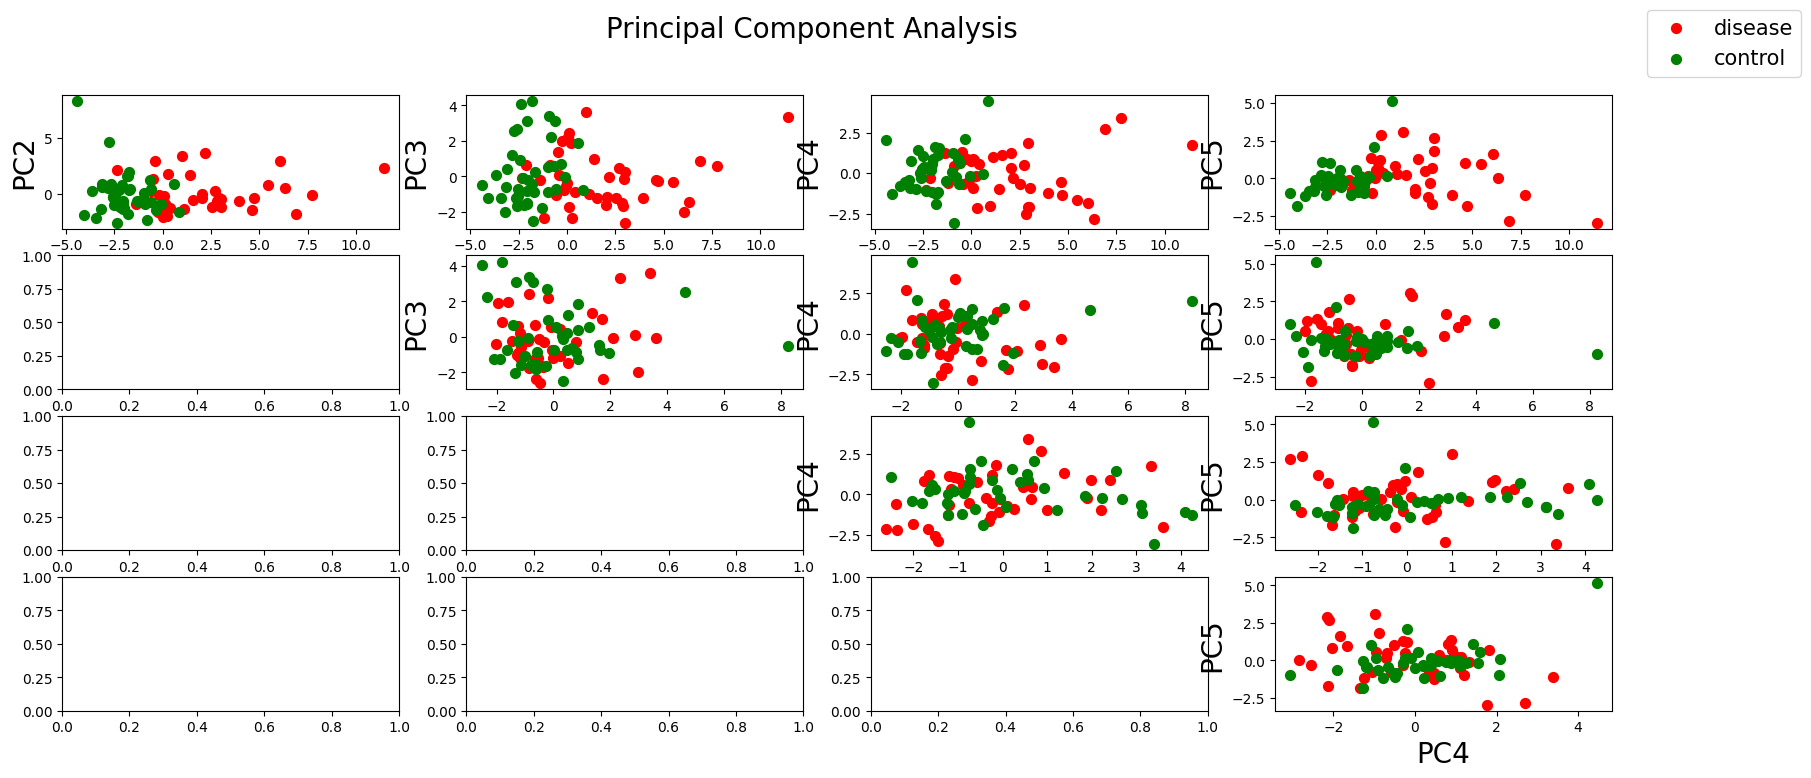

In [17]:
plotting(pca5_plasma_df, 5)

In [18]:
# now do PCA for 10, 15, 20
pca10_plasma = pca_analysis(plasma, 10)
pca10_plasma_df = make_dataframe(pca10_plasma, 10)

pca15_plasma = pca_analysis(plasma, 15)
pca15_plasma_df = make_dataframe(pca15_plasma, 15)

pca20_plasma = pca_analysis(plasma, 20)
pca20_plasma_df = make_dataframe(pca20_plasma, 20)
# print(pca20_plasma.head)

In [19]:
# pca15_plasma_df.to_csv("plasma/pca15_plasma_metabolics.csv")

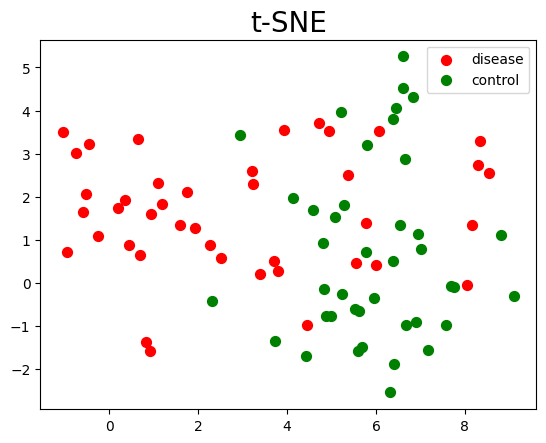

In [20]:
tsne2_plasma = tsne_analysis(plasma, 2)

tsne2_plasma_df = tsne_dataframe(tsne2_plasma, 2)
# print(tsne2_plasma_df.head)
# plotting(tsne2_plasma_df, 1, 1)
plt.title("t-SNE",fontsize=20)

for target, color in zip(targets,colors):
    indicesToKeep = tsne2_plasma_df.Class == target
    plt.scatter(tsne2_plasma_df.loc[indicesToKeep, 'tsne1']
               , tsne2_plasma_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)
plt.legend(targets,prop={'size': 10})

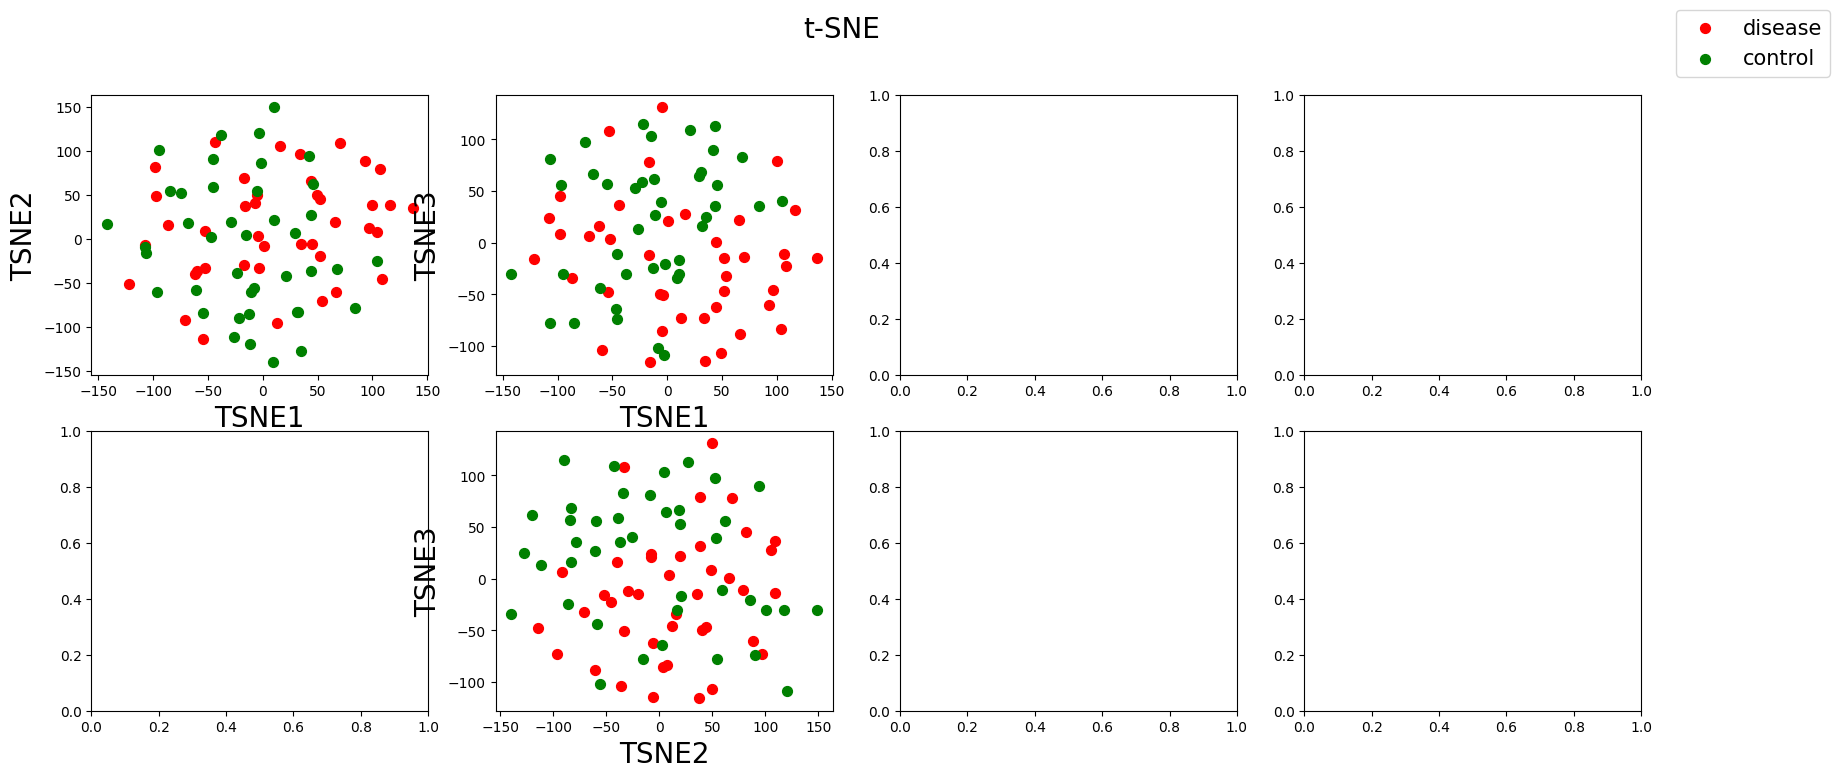

In [21]:
tsne3_plasma = tsne_analysis(plasma, 3)

tsne3_plasma_df = tsne_dataframe(tsne3_plasma, 3)
# print(tsne2_plasma_df.head)
tsne_plotting(tsne3_plasma_df, 3)


In [22]:
# tsne2_plasma_df.to_csv('plasma/tsne2_plasma_metabolics.csv')

## Serum

In [23]:
pca2_serum = pca_analysis(serum, 2)

pca2_serum_df = make_dataframe(pca2_serum, 2)
pca2_serum_df.head()

,pc1,pc2,Class
0,0.054619,-1.480652,disease
1,1.057281,-1.527579,disease
2,0.826877,-1.970506,disease
3,0.411985,-1.742265,disease
4,-2.011175,2.219647,disease


<Figure size 640x480 with 0 Axes>

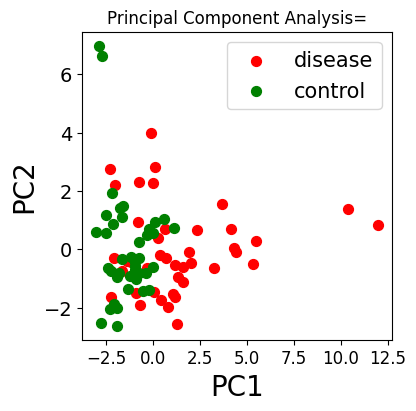

In [24]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis=",fontsize=12)
targets = ['disease', 'control']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_serum_df.Class == target
    plt.scatter(pca2_serum_df.loc[indicesToKeep, 'pc1']
               , pca2_serum_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [25]:
pca3_serum = pca_analysis(serum, 3)

pca3_serum_df = make_dataframe(pca3_serum, 3)
# pca3_df.head()

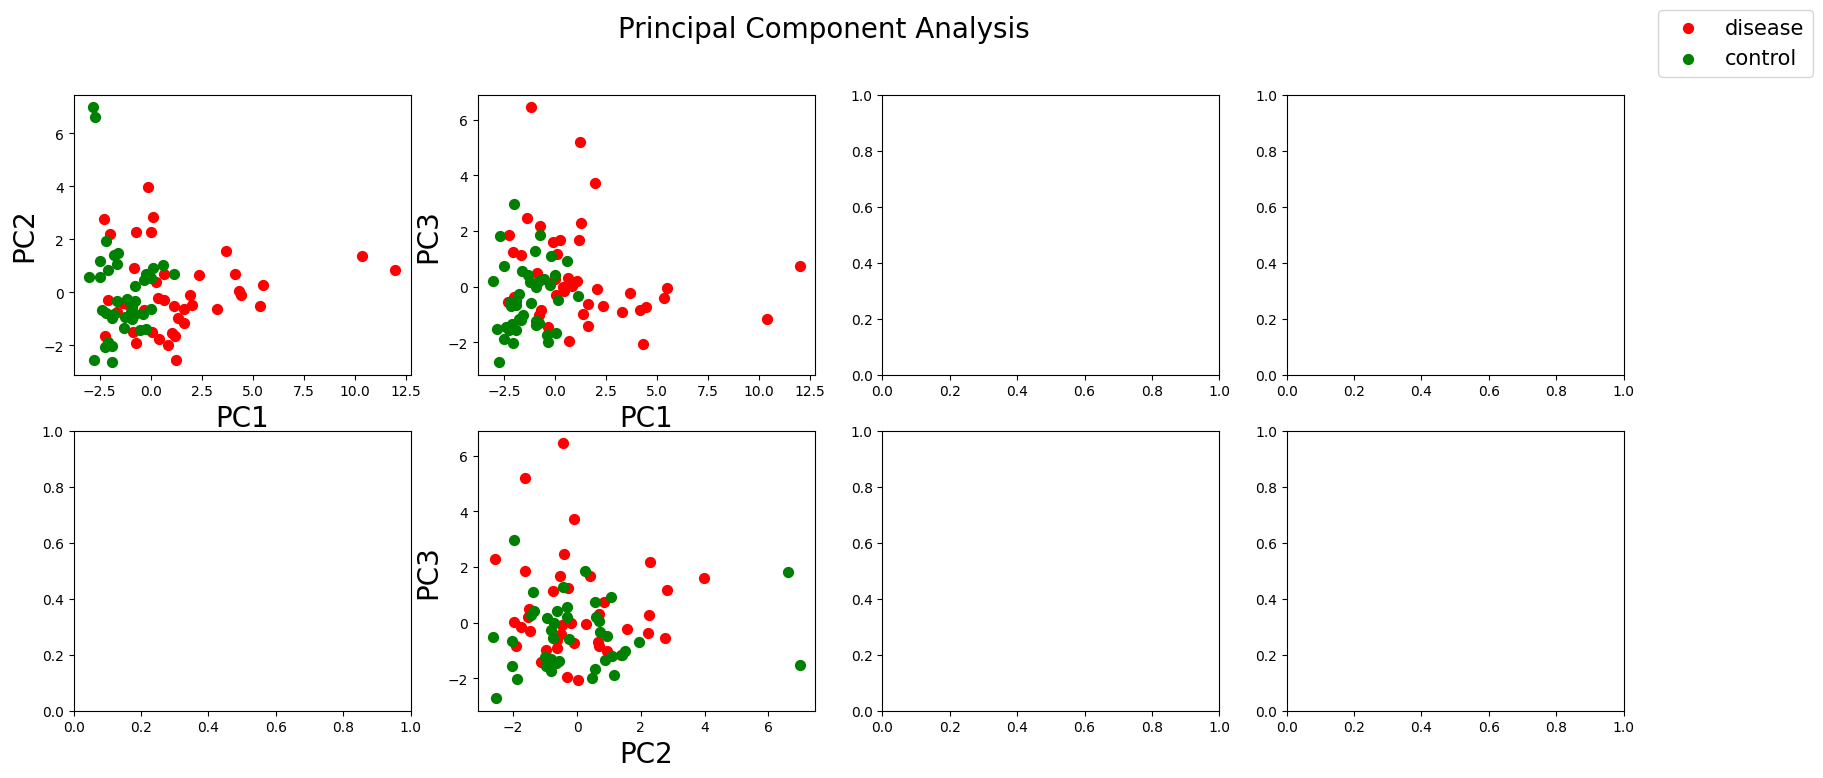

In [26]:
plotting(pca3_serum_df, 3)

In [27]:
pca4_serum = pca_analysis(serum, 4)

pca4_serum_df = make_dataframe(pca4_serum, 4)
# pca4_serum_df.head()

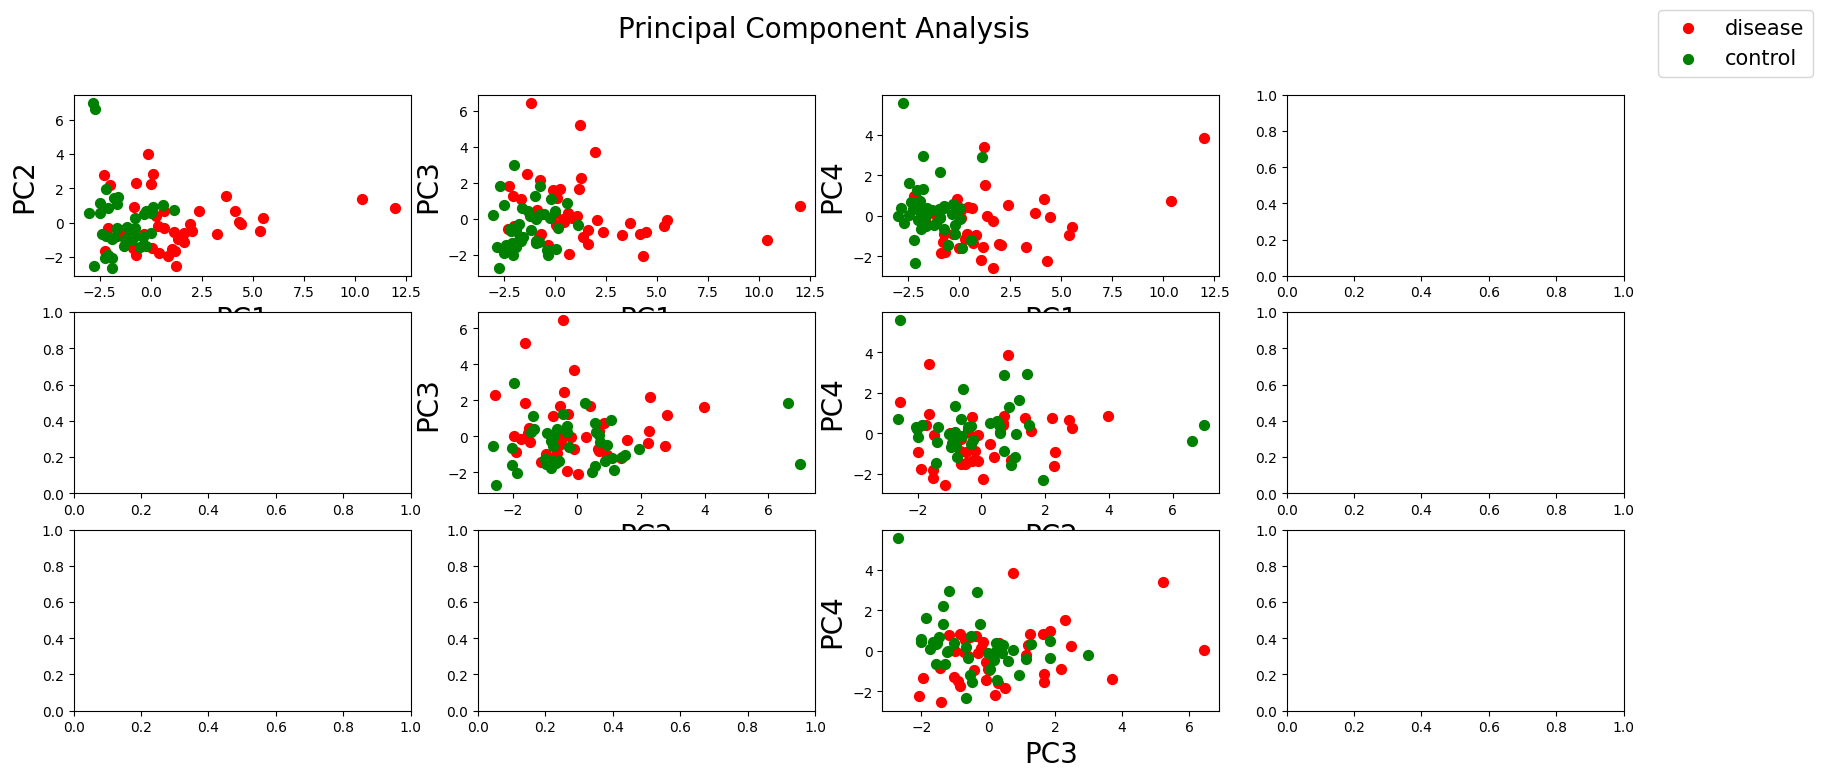

In [28]:
plotting(pca4_serum_df, 4)

In [29]:
pca5_serum = pca_analysis(serum, 5)

pca5_serum_df = make_dataframe(pca5_serum, 5)
# pca5_serum_df.head()

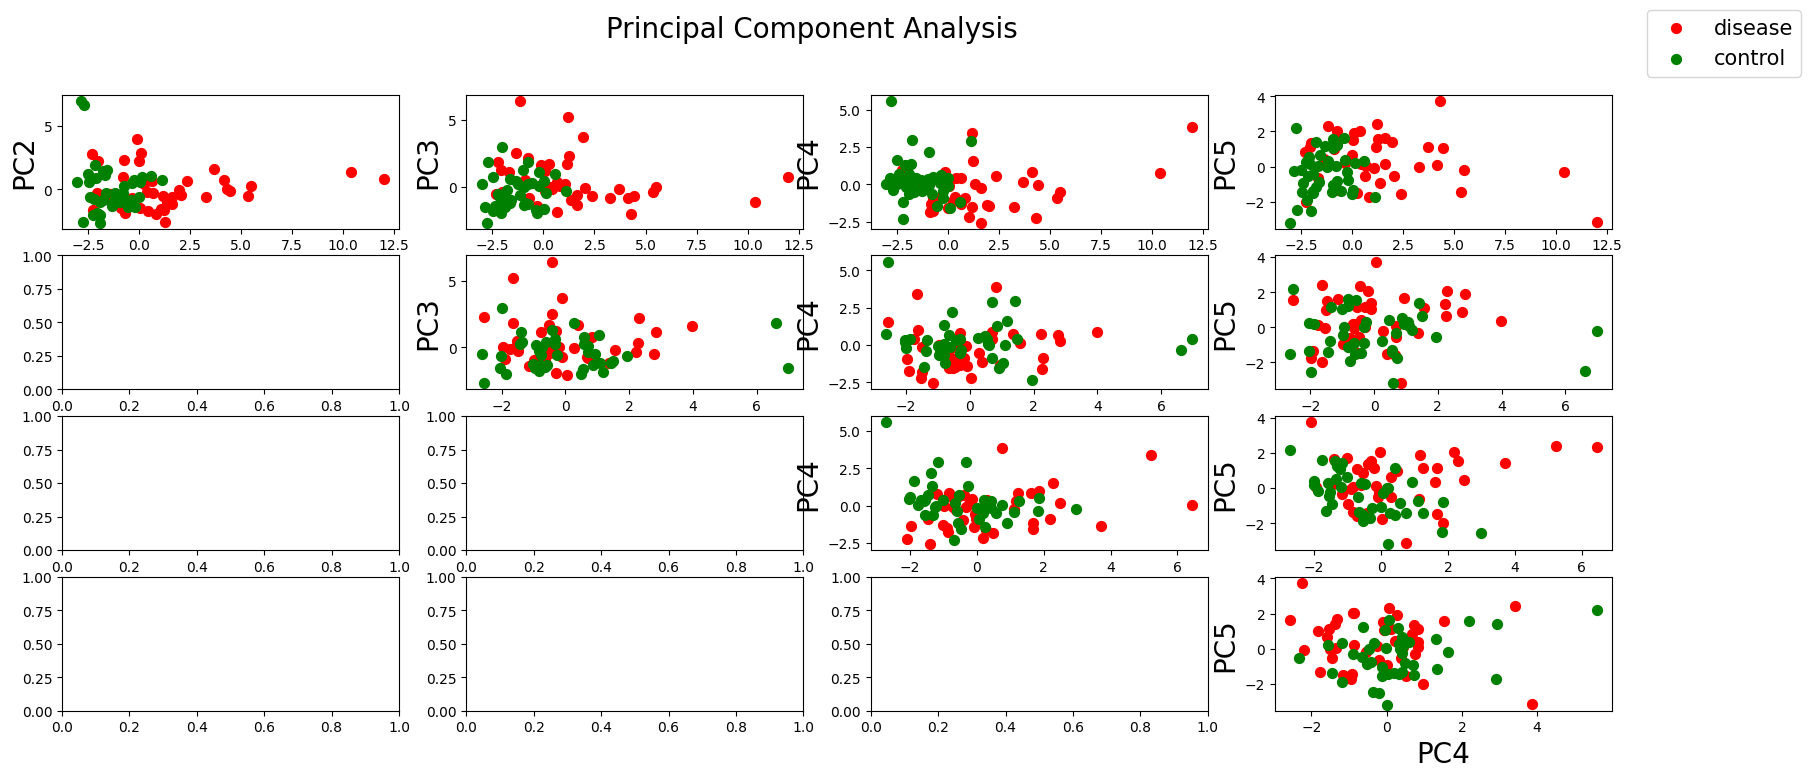

In [30]:
plotting(pca5_serum_df, 5)

In [31]:
# now do PCA for 10, 15, 20
pca10_serum = pca_analysis(serum, 10)
pca10_serum_df = make_dataframe(pca10_serum, 10)

pca15_serum = pca_analysis(serum, 15)
pca15_serum_df = make_dataframe(pca15_serum, 15)

pca20_serum = pca_analysis(serum, 20)
pca20_serum_df = make_dataframe(pca20_serum, 20)
# pca20_serum.head()

In [32]:
# pca15_serum_df.to_csv("serum/pca15_serum_metabolics.csv")

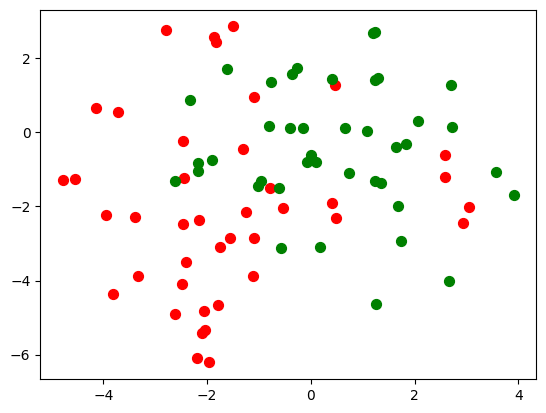

In [33]:
tsne2_serum = tsne_analysis(serum, 2)

tsne2_serum_df = tsne_dataframe(tsne2_serum, 2)
# print(tsne2_serum_df.head)
# plotting(tsne2_serum_df, 1, 1)

for target, color in zip(targets,colors):
    indicesToKeep = tsne2_serum_df.Class == target
    plt.scatter(tsne2_serum_df.loc[indicesToKeep, 'tsne1']
               , tsne2_serum_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)

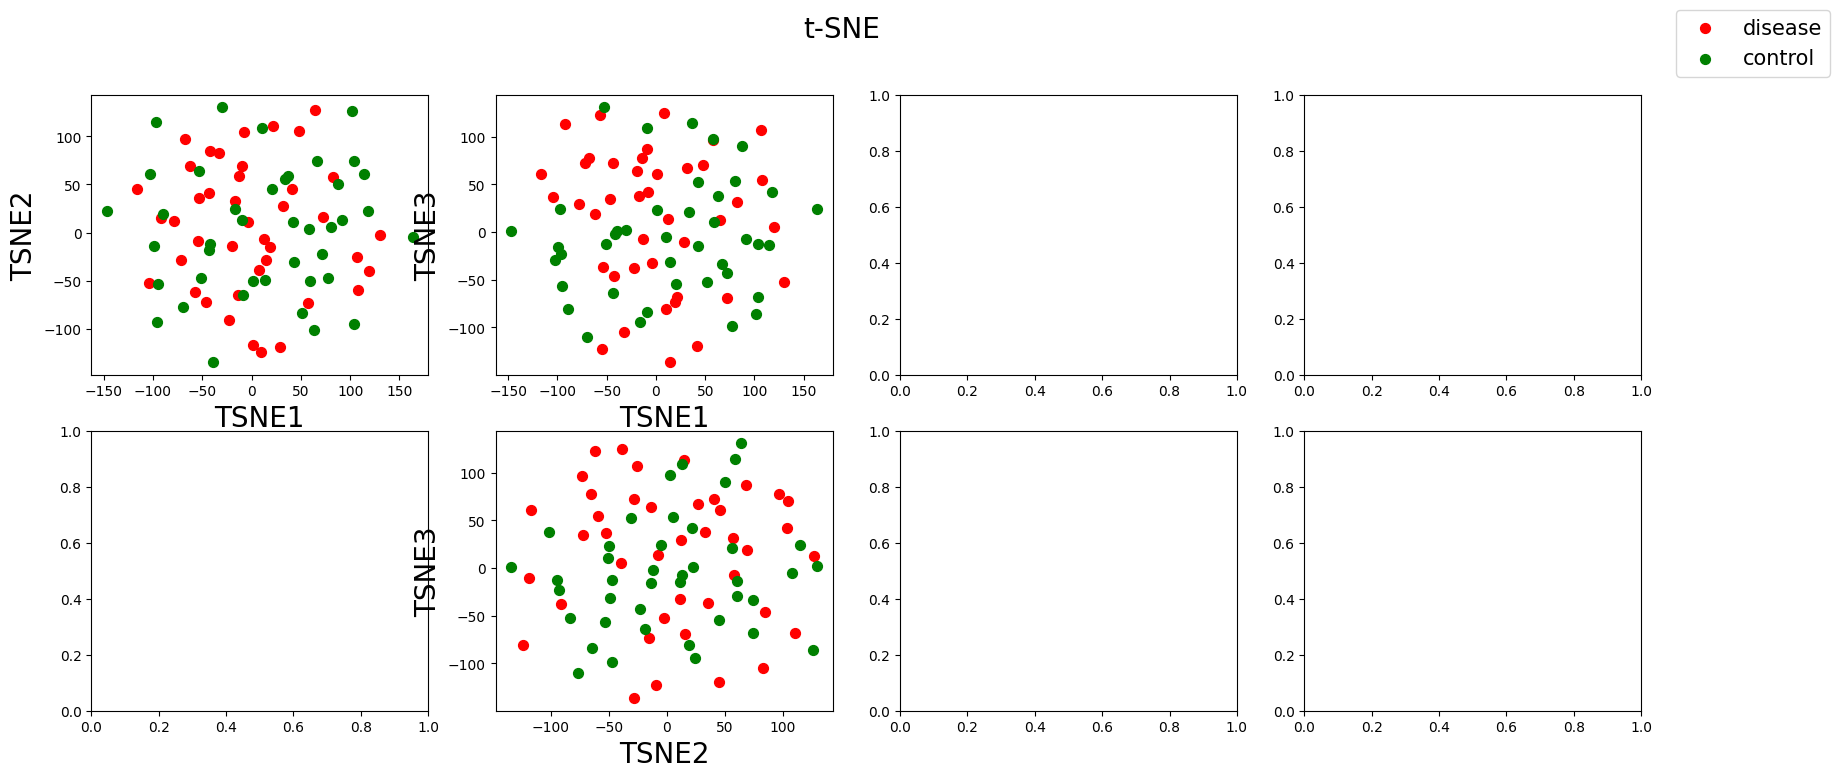

In [34]:
tsne3_serum = tsne_analysis(serum, 3)

tsne3_serum_df = tsne_dataframe(tsne3_serum, 3)
# print(tsne3_serum_df.head)
tsne_plotting(tsne3_serum_df, 3)


In [35]:
# tsne2_serum_df.to_csv('plasma/tsne2_serum_metabolics.csv')

# Models

In [36]:
# !pip install lazypredict

In [37]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold

In [38]:
def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

In [40]:
pca15_serum_df.dtypes

pc1      object
pc2      object
pc3      object
pc4      object
pc5      object
pc6      object
pc7      object
pc8      object
pc9      object
pc10     object
pc11     object
pc12     object
pc13     object
pc14     object
pc15     object
Class    object
dtype: object

In [41]:
# # make the independent variables float type
# pca2_plasma_df['Class'].map({"control": 0, "disease": 1})
# plasma = pca2_plasma_df.apply(pd.to_numeric)
# plasma

In [42]:
accuracy = []
for k in [0, 2, 3, 4, 5, 10, 15, 20, 22, 23]:
    if k==0:
        name = ['Plasma(Specific Metabolics)', 'Serum(Specific Metabolics)']
        dfs = [plasma, serum]
    elif k==22 or k==23:
        name = [f'tsne{k-20}_plasma(Specific Metabolics)', f'tsne{k-20}_serum(Specific Metabolics)']
        dfs = [vars()[f'tsne{k-20}_plasma_df'], vars()[f'tsne{k-20}_serum_df']]
    else:
        name = [f'pca{k}_plasma(Specific Metabolics)', f'pca{k}_serum(Specific Metabolics)']
        dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
      result = []
      X, y = get_xy(data)
      rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)
      raw_x = X
      for train_index, test_index in rs.split(X):
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #     print(X_train, X_test, y_train, y_test)

        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        result.append(models)
    #     print(result)

      acc = []
      for i in range(10):
    #     print(result[i].iloc[0]['Balanced Accuracy'])
        acc.append(result[i].iloc[0]['Balanced Accuracy'])

      print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
      accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

100%|██████████| 29/29 [00:00<00:00, 29.43it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:01<00:00, 19.32it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 23.51it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:01<00:00, 23.83it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 30.61it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 32.88it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 34.52it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 30.96it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 31.34it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 30.00it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 32.82it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 33.17it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 32.43it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 34.19it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 29.80it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 30.59it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 29.80it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:01<00:00, 25.34it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 27.61it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 29.54it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 32.56it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 35.18it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 25.57it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 35.14it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 32.19it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 31.15it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 33.78it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 28.47it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 32.19it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 31.10it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 33.81it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 33.99it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 28.34it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 37.60it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 33.99it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 36.81it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 29.36it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 24.45it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 20.11it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 20.86it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 25.18it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 13.19it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 12.09it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 13.18it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 13.42it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 12.97it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 13.60it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 14.22it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 13.37it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 13.34it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 12.80it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 12.89it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 12.55it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 12.13it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 11.92it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 12.28it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 11.57it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 11.85it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 18.78it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 39.45it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 27.67it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 34.49it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 33.50it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 27.46it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 25.01it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 27.05it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 26.91it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 18.95it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 18.46it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 16.85it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 11.70it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 12.24it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 12.61it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 13.33it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 30.41it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 26.75it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 36.56it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 31.03it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 38.25it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 32.02it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 34.73it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

100%|██████████| 29/29 [00:00<00:00, 31.57it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 29/29 [00:00<00:00, 30.34it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

100%|██████████| 29/29 [00:00<00:00, 34.72it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 29/29 [00:00<00:00, 33.79it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 29/29 [00:00<00:00, 33.18it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

100%|██████████| 29/29 [00:00<00:00, 32.53it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

100%|██████████| 29/29 [00:00<00:00, 35.02it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

100%|██████████| 29/29 [00:00<00:00, 34.10it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 29/29 [00:00<00:00, 34.64it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 29/29 [00:01<00:00, 27.66it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

100%|██████████| 29/29 [00:00<00:00, 31.82it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 29/29 [00:00<00:00, 34.82it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

100%|██████████| 29/29 [00:00<00:00, 37.18it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 29/29 [00:00<00:00, 36.71it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 29/29 [00:00<00:00, 32.00it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

100%|██████████| 29/29 [00:00<00:00, 36.60it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

100%|██████████| 29/29 [00:01<00:00, 20.97it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 29/29 [00:01<00:00, 21.35it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 29/29 [00:01<00:00, 18.20it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

100%|██████████| 29/29 [00:01<00:00, 15.67it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:02<00:00, 11.79it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 12.65it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:01<00:00, 17.57it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 34.52it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 33.84it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 32.51it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 29.87it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 34.70it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 34.47it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 35.81it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 29.07it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 36.03it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 34.05it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 37.60it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 32.63it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 32.73it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 33.43it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 34.93it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 25.91it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 33.21it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:01<00:00, 28.71it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 17.28it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 32.13it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 33.34it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 31.84it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 39.68it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 38.29it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 34.70it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

100%|██████████| 29/29 [00:00<00:00, 36.31it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 31.56it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 29.47it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 30.87it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:01<00:00, 26.61it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 32.22it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 30.36it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:01<00:00, 28.32it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 30.19it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 29.63it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 30.60it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 29.44it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 468
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 30.53it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 468
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 29.04it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 466
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 30.53it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 28.32it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 28.87it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 468
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 31.29it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 29.83it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 31.48it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 34.12it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 466
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 28.26it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:01<00:00, 27.61it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 32.54it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 467
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:00<00:00, 30.91it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 470
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 26.26it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 18.91it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:01<00:00, 18.08it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 468
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:01<00:00, 22.48it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 467
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 21.31it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 27.63it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 25.33it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 32.53it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 21.44it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 29.33it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 31.49it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 26.38it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 34.98it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 29.80it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 30.93it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 28.92it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 29.82it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 22.90it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:01<00:00, 27.89it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:00<00:00, 32.95it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 31.77it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 30.82it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 27.12it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

100%|██████████| 29/29 [00:00<00:00, 32.85it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 30.21it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 33.70it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:00<00:00, 29.75it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:01<00:00, 18.81it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 11.75it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 12.68it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

100%|██████████| 29/29 [00:02<00:00, 12.98it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 12.19it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 12.25it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 12.39it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 12.80it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 12.13it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 10.83it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

100%|██████████| 29/29 [00:05<00:00,  5.40it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 11.61it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 11.21it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 11.69it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 11.74it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 11.53it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 12.43it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 12.61it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████| 29/29 [00:02<00:00, 12.59it/s]

[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [43]:
accuracy_df = pd.DataFrame(accuracy, columns=['Processed Dataset', 'Accuracy'])

In [44]:
# accuracy_df.to_csv('accuracy/accuracy_Specific Metabolics.csv')
accuracy_df

,Processed Dataset,Accuracy
0,Plasma(Specific Metabolics),0.8820318570318569
1,Serum(Specific Metabolics),0.9286761849261849
2,pca2_plasma(Specific Metabolics),0.8960372960372961
3,pca2_serum(Specific Metabolics),0.8873300310800311
4,pca3_plasma(Specific Metabolics),0.8938956876456878
5,pca3_serum(Specific Metabolics),0.8795600233100233
6,pca4_plasma(Specific Metabolics),0.9015928515928516
7,pca4_serum(Specific Metabolics),0.8731206293706293
8,pca5_plasma(Specific Metabolics),0.9033022533022533
9,pca5_serum(Specific Metabolics),0.8980623543123544


In [45]:
name = ['plasma']
dfs = [plasma]

random_state = 42

for idx, data in enumerate(dfs):
  result = []
  X, y = get_xy(data)
  rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)
  raw_x = X
  for train_index, test_index in rs.split(X):
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(X_train, X_test, y_train, y_test)

    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    result.append(models)
#     print(result)

  acc = []
  for i in range(10):
#     print(result[i].iloc[0]['Balanced Accuracy'])
    acc.append(result[i].iloc[0]['Balanced Accuracy'])

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:02<00:00, 11.64it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

100%|██████████| 29/29 [00:02<00:00, 13.25it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 12.68it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:02<00:00, 13.08it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 13.49it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 13.17it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:02<00:00, 12.69it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:02<00:00, 13.41it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 13.36it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:02<00:00, 13.59it/s]

[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [46]:
result

[                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 RidgeClassifierCV                  0.88               0.91     0.91      0.88   
 SVC                                0.88               0.91     0.91      0.88   
 NuSVC                              0.88               0.91     0.91      0.88   
 LogisticRegression                 0.88               0.91     0.91      0.88   
 XGBClassifier                      0.88               0.87     0.87      0.88   
 RandomForestClassifier             0.88               0.87     0.87      0.88   
 BaggingClassifier                  0.88               0.87     0.87      0.88   
 LinearDiscriminantAnalysis         0.88               0.87     0.87      0.88   
 CalibratedClassifierCV             0.82               0.86     0.86      0.83   
 BernoulliNB                        0.82               0.83     0.83      0.83   
 RidgeClassifier